# COMS21202: Symbols, Patterns and Signals #
# Lab 3: Least Square Method #

---
Tip: You will need to refer to the help pages to complete most of these examples.
Tip: There is slight difference between `np.array` and `np.matrix` especially when it comes to operations on those. If you're not shure what type is given object try `print( type(x) )`.

To start with, run the code cell below to import  needed libraries.

In [2]:
import numpy as np
from scipy import stats
from skimage import data, io, color, transform, exposure
from pprint import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from __future__ import print_function

%matplotlib inline
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

## 1.  Get some numbers ##
**a) **Generate a sequence of 10 numbers ${y_i}$, $1\leq i\leq 10$, using the following equation
$$
y_i=0.2+0.5x_i+e_i
$$
where $x_i$ is a *uniformly distributed* random number between 0 and 1 and $e_i$ is a *random* number from $N(0,0.1)$ indicating a normally-distributed error in the measurement.

In [7]:

x = np.random.uniform(0,1,10)
e = np.random.normal(0,0.1,10)

y = 0.2+0.5*x+e


**b) **Generate a scatter plot of $x_i, y_i$.

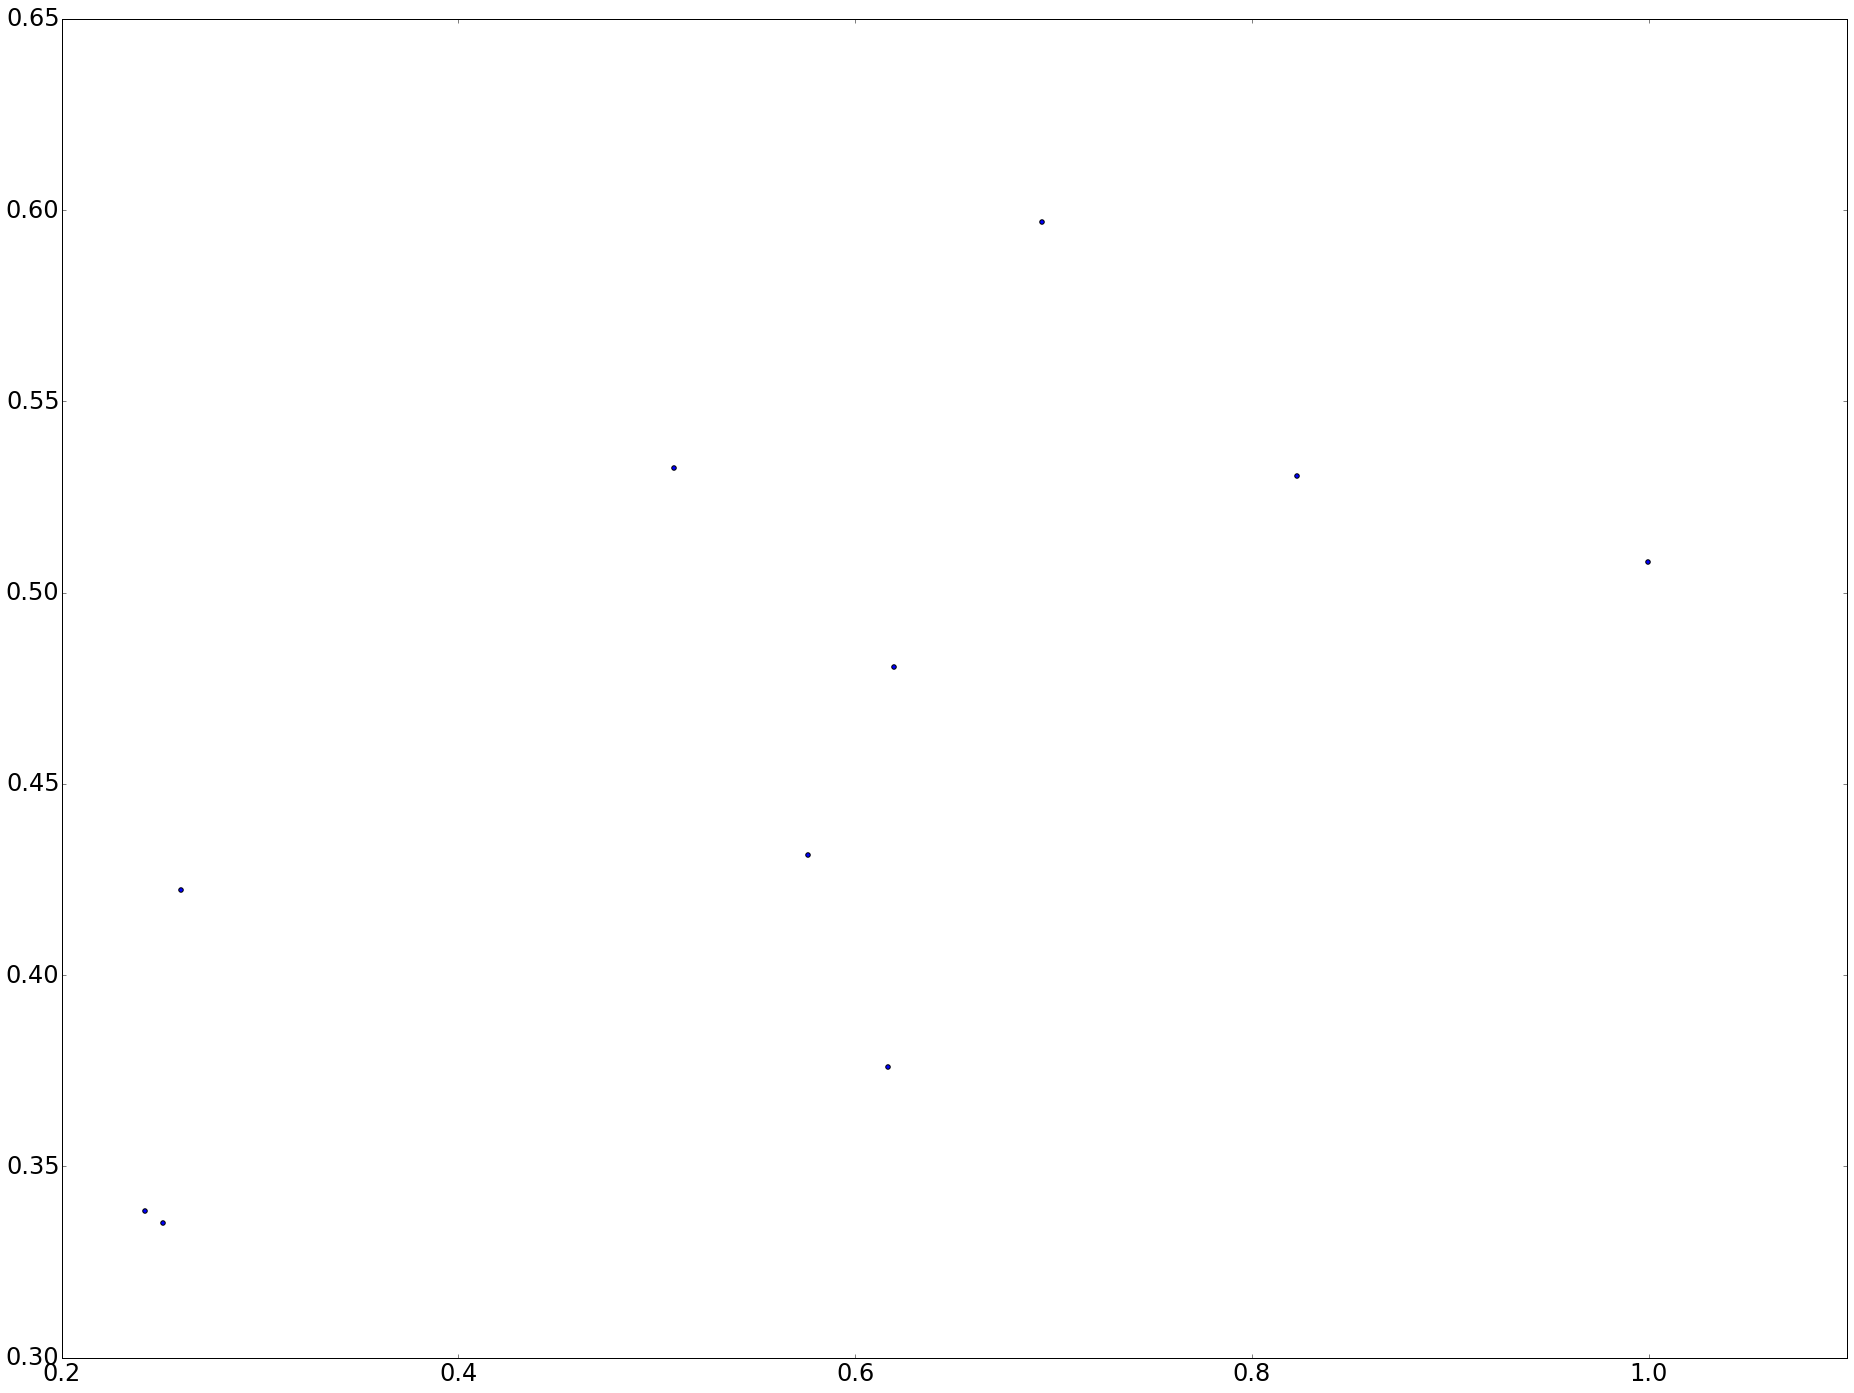

In [8]:
plt.scatter(x,y)

## 2. Create a general function ##
Change the above code to a function that receives the parameters $m$, $c$ and $n$ for the equation $y_i = c + m x_i + e_i$ and returns $n$ samples as shown in the previous exercise.  
Use the code to generate a 100 samples from the equation above and scatter plot the new sample.

In [9]:
def generateSample(m,c,n):
    x = np.random.uniform(0,1,n)
    e = np.random.normal(0,0.1,n)
    y = c+m*x+e
#     plt.scatter(x,y)
    return y 
y2 = generateSample(0.5,0.2,100)


## 3. Least squares - Matrix Form ##
Using the sequences ${y_i}$ and ${x_i}$ from **Q2**, implement the matrix form of the method of least squares to determine estimates of the parameters $a$ and $b$ assuming that $y_i=a+bx_i+e_i$.

In [105]:
x = np.random.uniform(0,1,100)
e = np.random.normal(0,0.1,100)
y = 0.5+0.2*x+e
A = np.vstack([x, np.ones(len(x))]).T
help(sorted)
a,b = np.linalg.lstsq(A, y)[0]
print (a,b)



Help on built-in function sorted in module __builtin__:

sorted(...)
    sorted(iterable, cmp=None, key=None, reverse=False) --> new sorted list

0.179383203088 0.525142941367


### Discuss: ### 
<font color="blue">what is the effect of changing the mean and the standard deviation of ei on the
estimated values of m and c
</font>

it will increase the mean 


## 4. Line fitting ##

Draw the line defined by the estimated values of $a$ and $b$ on top of the scatter plot generated in **Q2**. Note: do not use any pre-defined functions. Write your own code to plot the line.

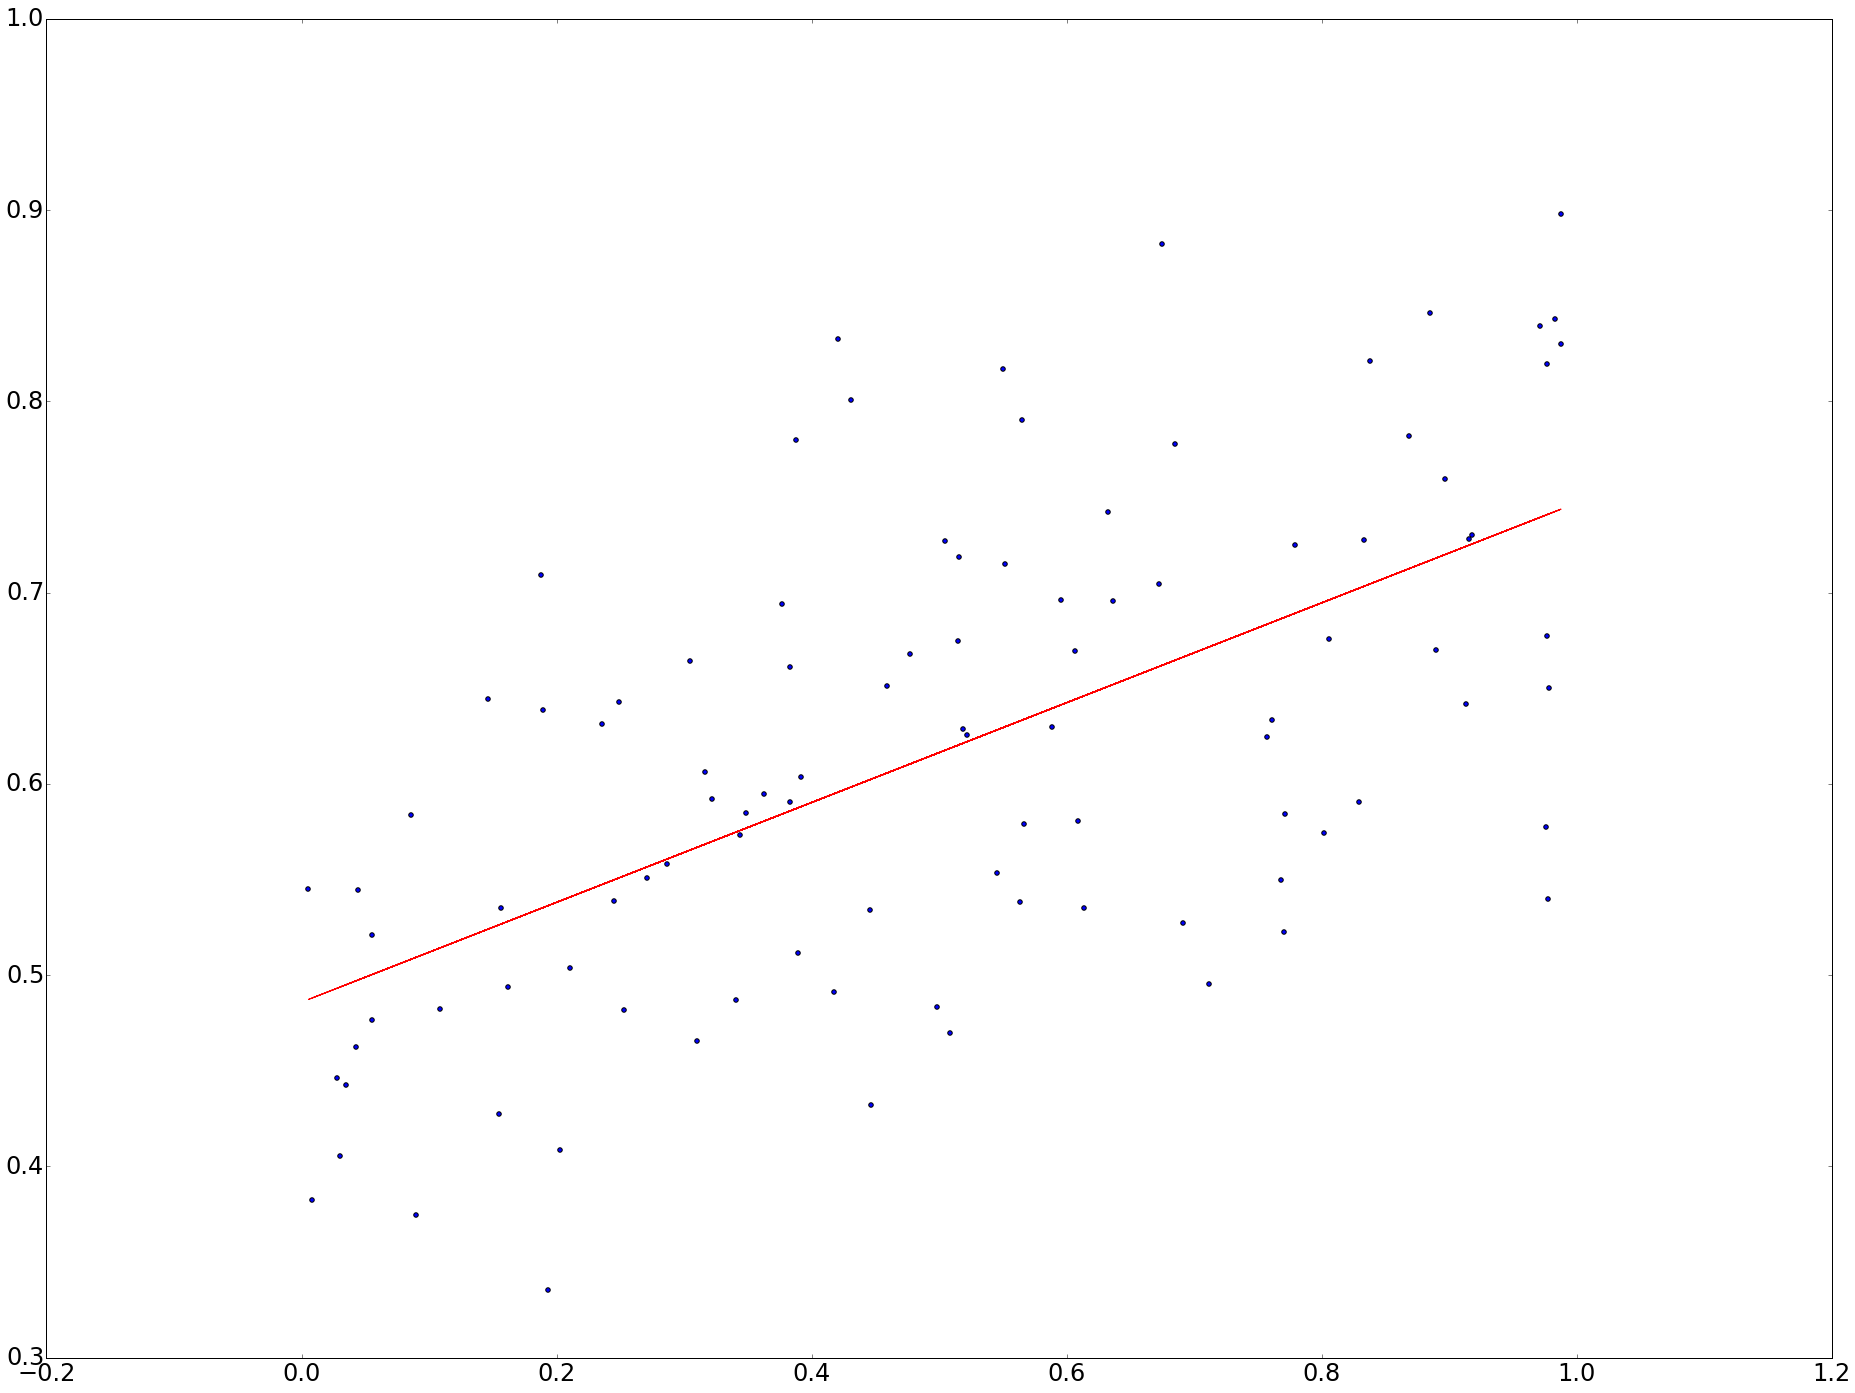

In [77]:
plt.scatter(x,y)
plt.plot(x,a*x+b,"r",label = 'Fitted line')

## 5. Outliers ##
Add a few outliers to your data. For example, add the points {(0.5, 5), (0.6, 5), (0.7, 5)} to the sampled sequences from Q2.

Re-estimate the best line that fits the data after the addition of the outliers.

Plot the best fit line before and after the outlier data, in a way similar to the figure below (including the colouring and the legend).

![Line fit](lineFit.jpg)

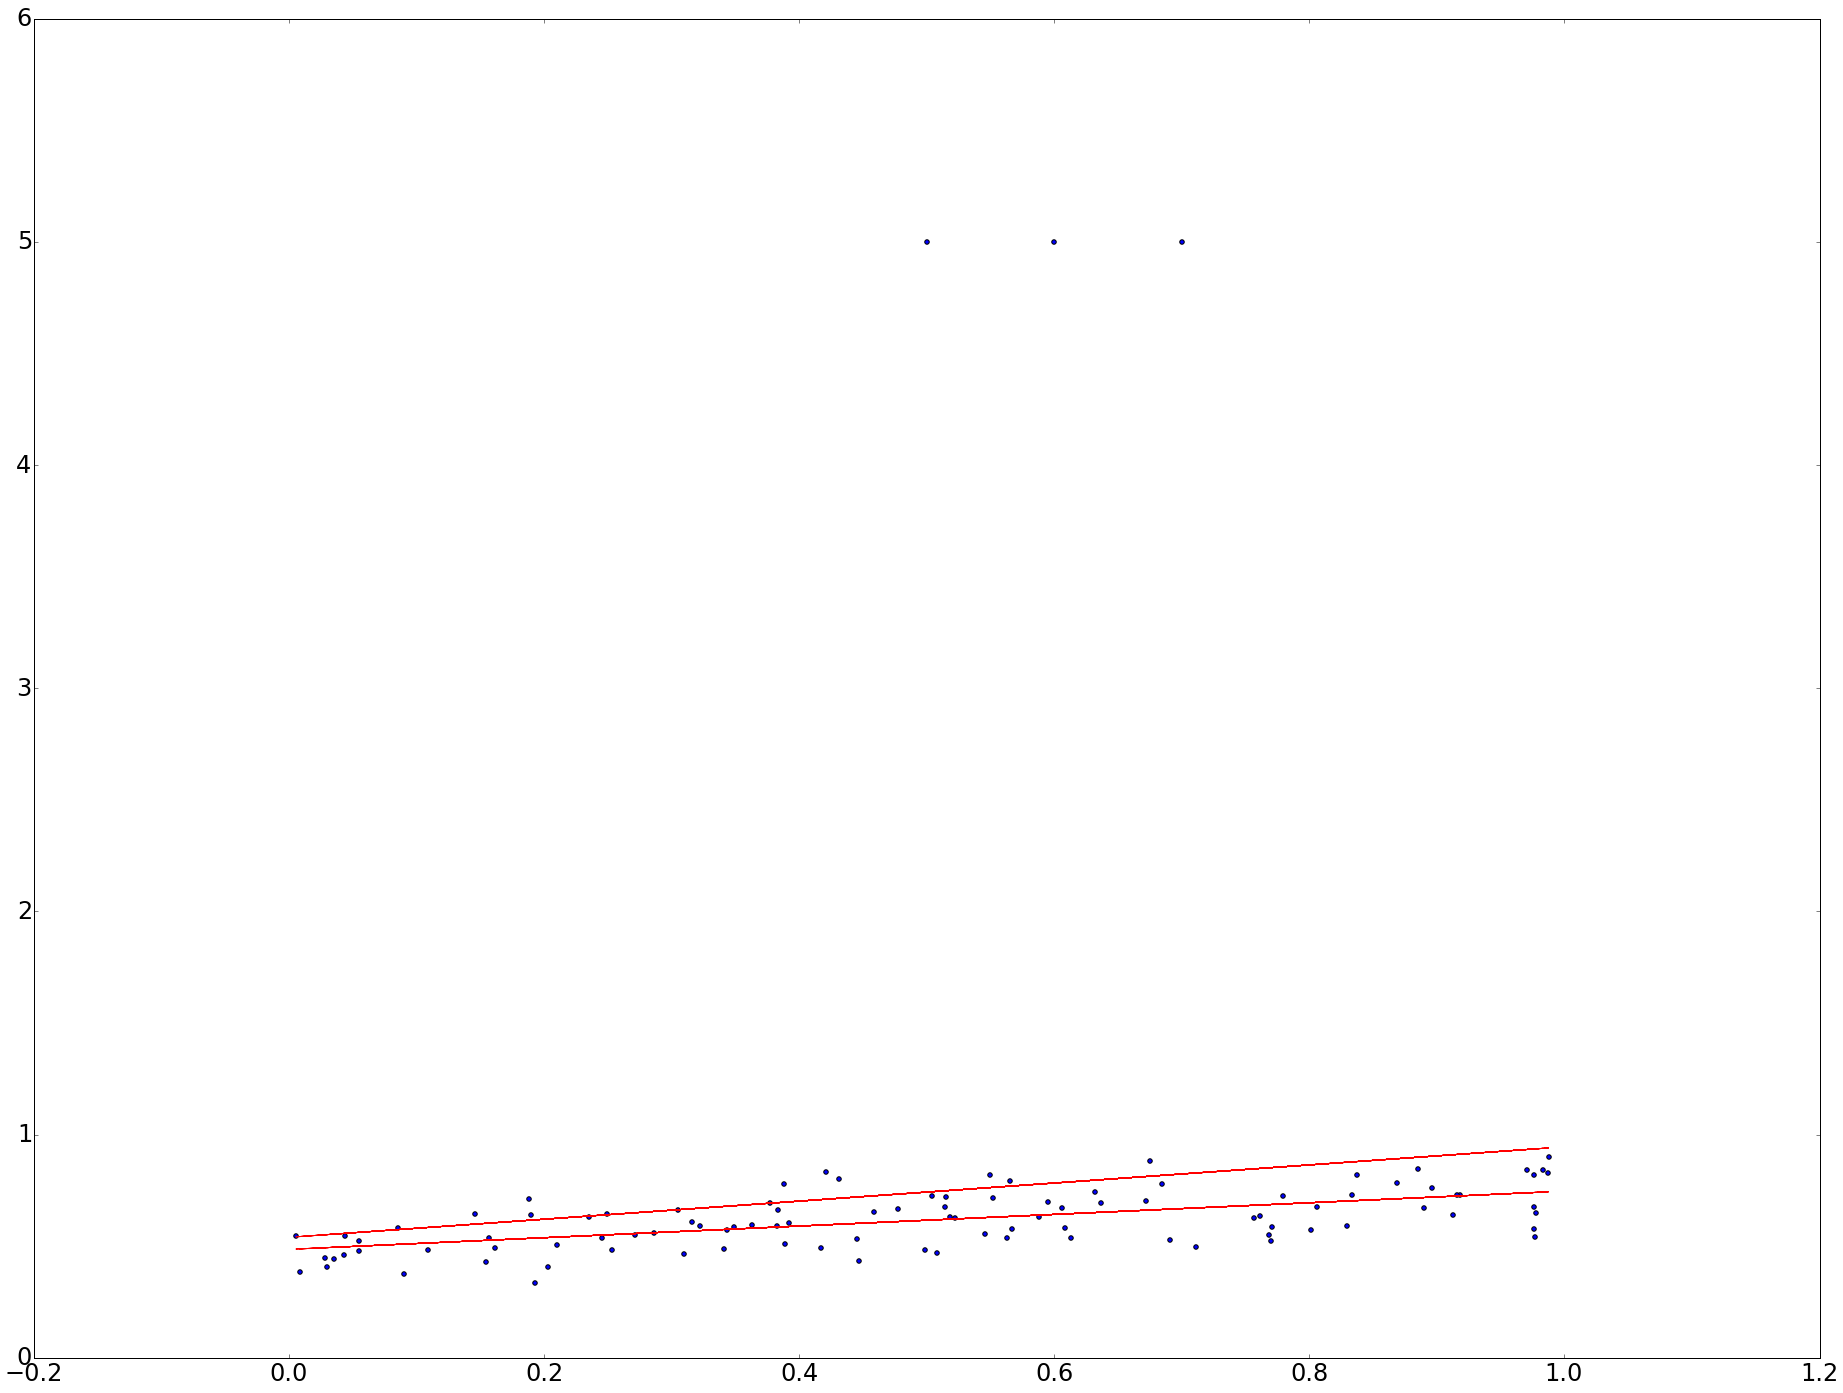

In [80]:

xr = np.append(x,[0.5,0.6,0.7])

yr = np.append(y,[5,5,5])
plt.scatter(xr,yr)

A = np.vstack([xr, np.ones(len(xr))]).T
ar,br = np.linalg.lstsq(A, yr)[0]

plt.plot(x,a*x+b,"r",label = 'Fitted line')
plt.plot(x,ar*x+br,"r",label = 'best fit with outliour')

### Discuss ###

<font color="blue">what is the effect of outliers on the best line estimate?</font>

## 6. Choosing your Model ##

### 6.1. Loading your data ###

Load the data in the file DMD.csv where the first column is $x_i$ and the second column is $y_i$.

Generate a scatter plot of $(x_i, y_i)$.

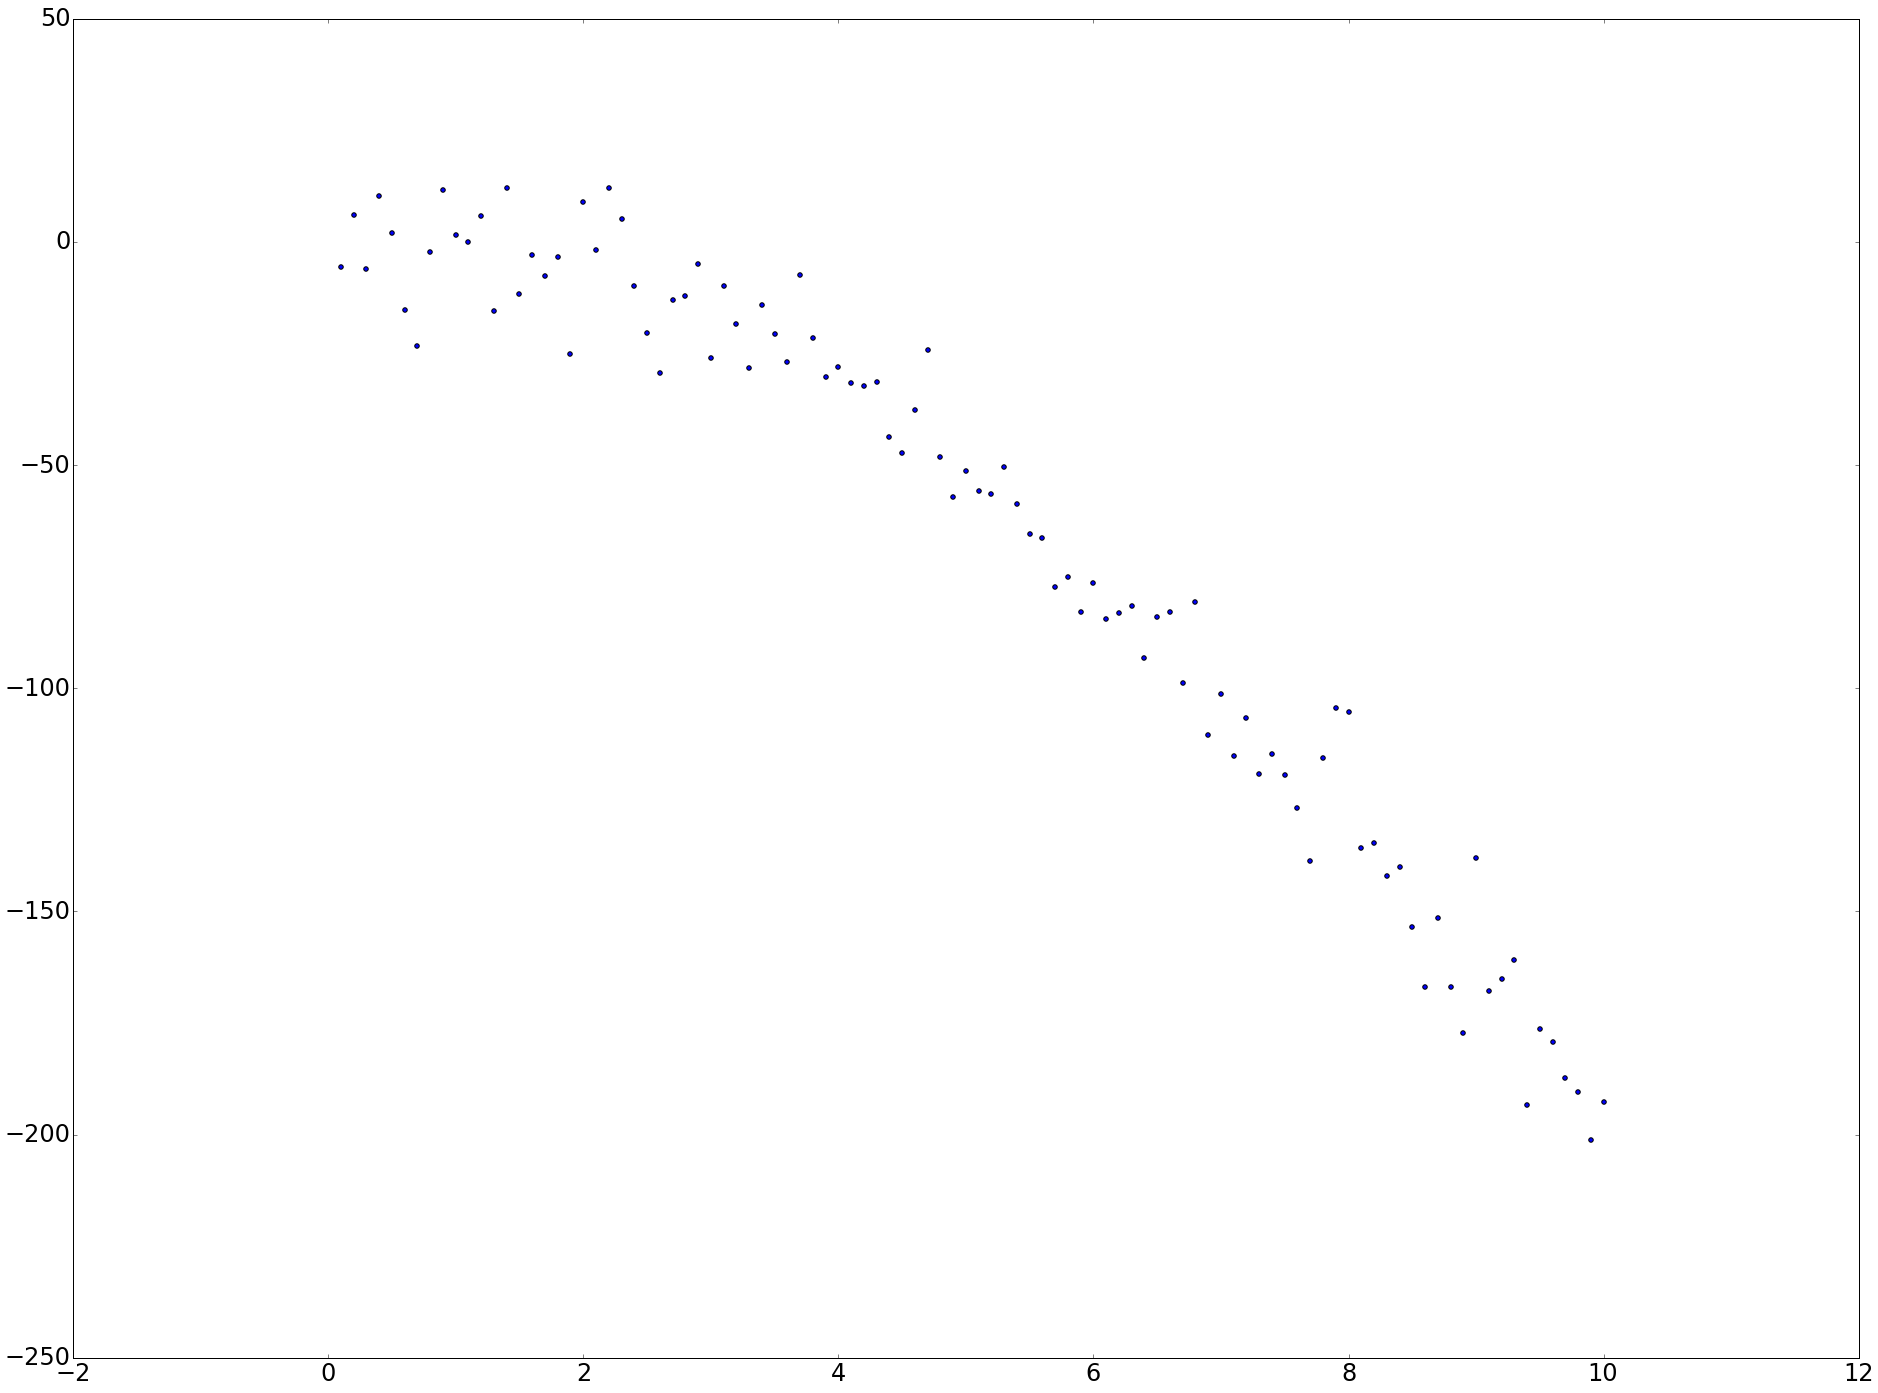

In [83]:
data = np.loadtxt("DMD.csv",delimiter= ",")
data.shape
plt.scatter(data[:,0],data[:,1])

### 6.2. Deciding on the Model's Complexity ###

Assuming a polynomial relationship between $x_i$ and $y_i$, what would you suggest as a suitable complexity for the model? Write your modelâ€™s equation.

SyntaxError: invalid syntax (<ipython-input-84-c37f905f7971>, line 1)

### Discuss ###

<font color="blue">for the model youâ€™ve chosen, what are the parameters of the model?</font>

[-1.94348557 -1.00601722  2.59410636]
<type 'numpy.float64'>
[-1.94348557 -1.00601722  2.59410636]


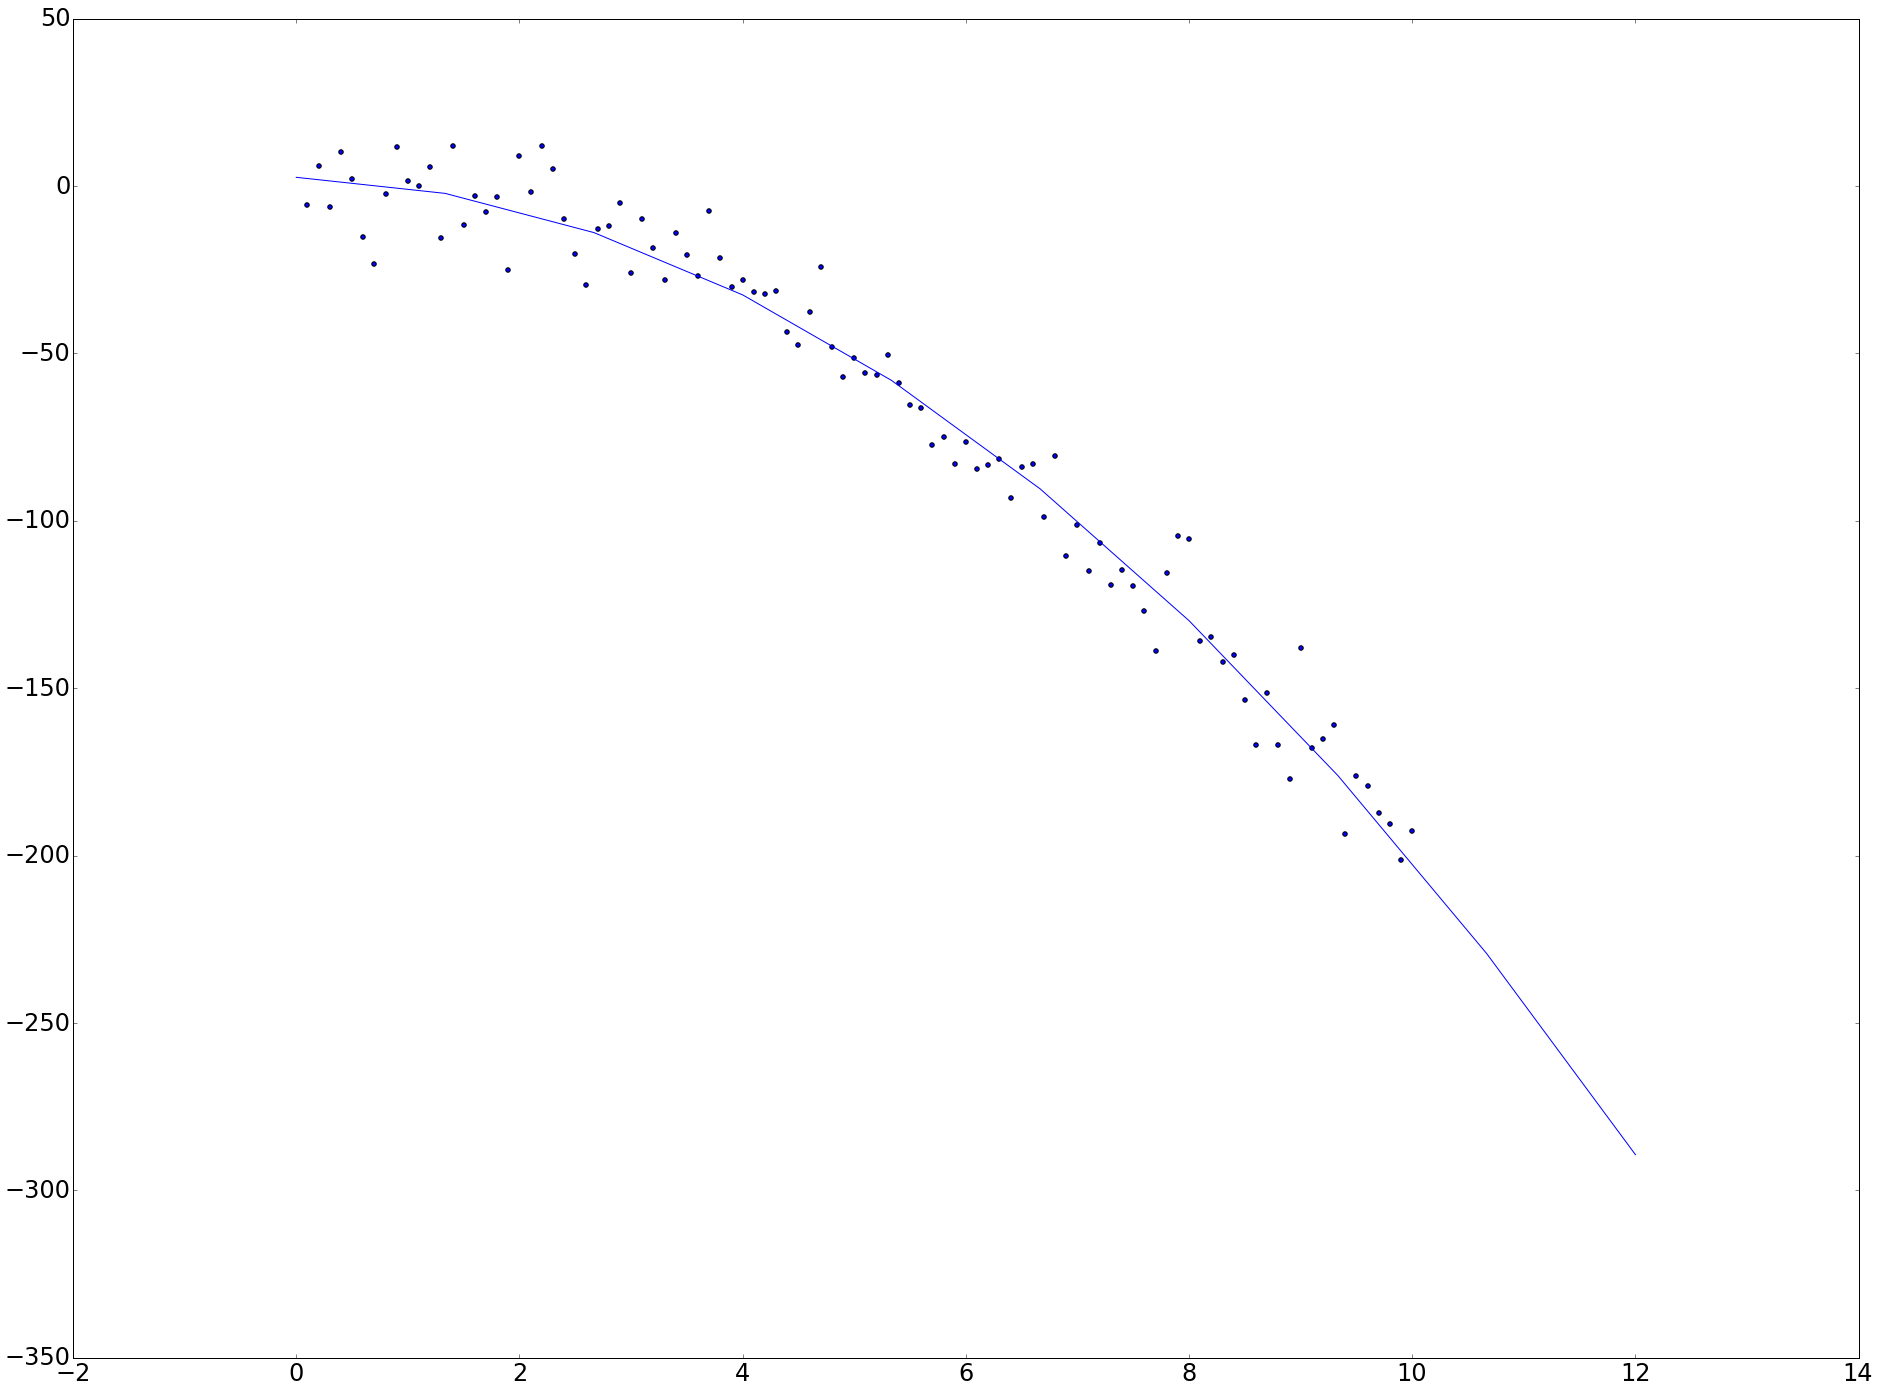

In [112]:

z = np.polyfit(data[:,0],data[:,1],2)
print(z)
u = np.linspace(0, 12, 10)   # Evaluate the polynomial at (other) points
v = np.polyval(z, u)
print (type(v[0]))
plt.scatter(data[:,0],data[:,1])
plt.plot(u, v, '-')
print (z)



### 6.2. Calculating the Model's Parameters ###

Adjust the code in Q3 if needed to calculate the parameters of your chosen model for this data.

### Discuss ###
<font color="blue">what would X and y in the least squares solution be?</font>

Plot your best fitting polynomail from Q8.

### 6.3. Generalisation and Overfitting ###

What would the model be if you generalise it further?

What would the model be if you attempt to overfit the training data?

### Discuss ###

<font color="blue">write down your answers for Q10 and Q11 and discuss your written explanation
with a TA</font>